# Logitic Regression

This notebook demonstrates the implementation of a binary classifier with a **Logistic Regression**.
1. implement from scratch (numpy and scipy)
2. use sckit-learn
Logistic Regression is the main tool behind classification.

## Problem
We generate a dataset for this exercice. The example is made of many examples but contains a single feature.

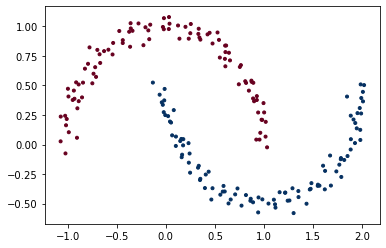

In [2]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# Generate a random dataset
n_samples = 200
# create random two interleaving halfcircles - Example 1
X, Y = datasets.make_moons(n_samples=n_samples, random_state=0, noise=0.05)
# create random two circles - Example 2
#X, y = datasets.make_circles(n_samples=n_samples, random_state=0, noise=0.02)

#X.shape is (n_samples, 2)
#y.shape is (n_samples)

cm = plt.cm.RdBu
plt.scatter(X[:,0], X[:,1], c=Y, cmap=cm, marker='.')

## Logistic Regression

### Sigmoid function
The **sigmoid function** (or logistic function) maps values into between 0 and 1 :  
$$sigmoid(z) : [-\infty,\infty]\mapsto  [0,1]$$ 
$$sigmoid(z)=\frac{1}{1+e^{-z}}$$

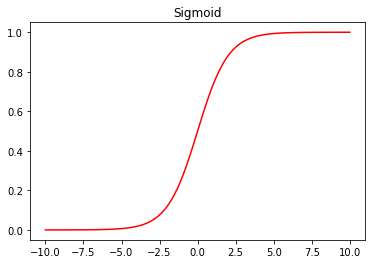

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-10,10,100)
y = sigmoid(x)
plt.title('Sigmoid')
plt.plot(x, y,'-r')

### Hypothesis function

The **hypothesis function** is the probability to have $y==1$
$$h_{\theta}(x)=sigmoid(\theta_{0}+\theta_{1}x)$$

$y==1$ if $h_{\theta}>=0.5$ \
and  \
$y==0$ if $h_{\theta}<0.5$


### Cost function
The **cost function** for logistic regression cannot use the **mean squared error (MSE)**.

TODO : the reason ?
The prediction functon is non-linear (due to sigmoid). Squaring this prediction with MSE results in a non-convex function.
The optimiser might not find the global minimum.

Instead, we are using **cross entropy**

Two **cost functions** are used for depending on the predicted $y$

if $y==1$ then $cost(h_{\theta}(x), y) = -\log(h_{\theta}(x))$ 

if $y==0$ then $cost(h_{\theta}(x), y) = -\log(1 - h_{\theta}(x))$ 

For computation efficiency, the cost function is reformulated into a single function :

$$cost(x, y)= -y\log(x) - (1-y)\log(1 - x)$$


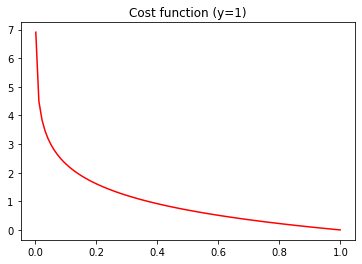

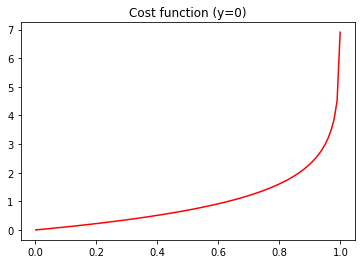

In [4]:
x = np.linspace(0.001,0.999,100)

plt.title('Cost function (y=1)')
y = -np.log(x)
plt.plot(x, y,'-r')
plt.show()

plt.title('Cost function (y=0)')
y = -np.log(1 - x)
plt.plot(x, y,'-r')
plt.show()

The total cost functions for $'m'$ examples is : 

$$J(\theta) = \frac{1}{m} \sum_{i=1}^m cost(h(x_{i}), y_{i})$$

## Solve

Finally, we need to minimize the function
$$\min_{\theta} J(\theta) =  \frac{1}{m} \sum_{i=1}^m cost(h(x_{i}), y_{i})$$

Unfortunaltely we cannot use  the **normal equation** to minimize the function and need to use iterative methods.

## Implementation (Numpy)

TODO

## Implementation (Scikit-learn)

Lets implement the logistic regression with Scikit-learn 

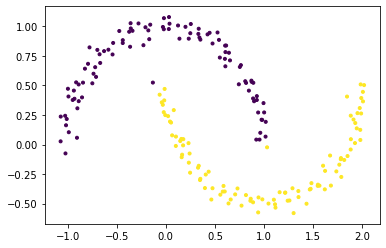

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import classification_report, confusion_matrix

preprocess = PolynomialFeatures(degree = 4, interaction_only=False, include_bias=False)
new_X = preprocess.fit_transform(X)

model = LogisticRegression(solver='liblinear', random_state=0) # aka hypothesis
model.fit(new_X, Y) # compute the parameters
categories = model.predict(new_X)

# Display the result
plt.scatter(X[:,0], X[:,1], c=categories, marker='.')